In [5]:
import numpy as np
from scipy import integrate
from utils import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Homework1 PETE 4241 - Vovle field

####   1. For the well 15_9-F-14 in the Volve field
---

In [33]:
#Unit Converter and basic paramters
ft=0.3048 #m
g_cm3=1000 #kg/m3
g=9.8 #m/s2
rho_w=1.02*g_cm3 #kg/m3
meter=1
mega=1e6 #Mega
Pa=1 #Pa

#Load and prepare the data
data = np.loadtxt("WLC_PETRO_COMPUTED_INPUT_1.DLIS.0.las", skiprows=48)
DZ,rho=data[:,0]*meter,data[:,1]*g_cm3

#clean data where negative density
DZ=DZ[np.where(rho>0)]
rho=rho[np.where(rho>0)]

print('Investigated Depth',[min(DZ),max(DZ)])

#Supply some data above the first depth
rho_avg=1.75*g_cm3
z0=DZ[0]

DZ=np.insert(DZ,0,[0,z0-1e-6])
rho=np.insert(rho,0,[rho_avg,rho_avg])

Investigated Depth [2777.9472, 3738.6768]


> ##### (a) Porosity by Athy's equation  
The vertical stress can be calculated in onshore and offshore as follows:  
$${{S}_{v}}={{\bar{\rho }}_{bulk}}g{{z}_{0}}+\int\limits_{{{z}_{0}}}^{z}{{{\rho }_{bulk}}(z)gdz} 
\quad \text{Onshore} $$
$$ {{S}_{v}}={{\rho }_{w}}g{{z}_{w}}+{{\bar{\rho }}_{bulk}}g({{z}_{0}}-{{z}_{w}})+\int\limits_{{{z}_{0}}-{{z}_{w}}}^{z}{{{\rho }_{bulk}}(z)gdz} 
\quad \text{Offshore} $$
The pore pressure can be calculated as follows:  
$${{p}_{p}}={{\bar{\rho }}_{w}}g{z} $$
The effective vertical stress $\sigma'_v$ can be calculated as follows:
$$\sigma'_v=\sigma_v - p_p $$
The porosity can be calculated as follows:
$$\phi=\phi_0 e^{-\beta \sigma'_v} $$

In [40]:
#GOM
Sv=integrate.cumtrapz(rho*g, DZ)


p_pore=rho_w*g*DZ



Sv_eff=Sv-p_pore[1:]
showTables(X=[DZ/1e3],Y=[Sv_eff/1e6],
           XLables=['Depth_GOM(km)'],
           YLabels=['Effective Vertical Stress (MPa)'])

phi0=0.386
beta=0.0313*(1/mega*Pa)

phi=phi0*np.exp(-beta*Sv_eff)
showTables(X=[DZ/1e3],Y=[phi],
           XLables=['Depth_GOM(km)'],
           YLabels=['Porosity'])

rho_w=1*g_cm3
rho_m=2.7*g_cm3
phi_DensityLog=(rho_m-rho)/(rho_m-rho_w)

,Depth_GOM(km),Effective Vertical Stress (MPa)
0,0.000000,20.417912
1,2.873807,21.840411
2,2.969971,23.346418
3,3.066136,24.661176
4,3.162300,25.810283
5,3.258464,27.043856
6,3.354629,28.237968
7,3.450793,29.407117
8,3.546958,30.614476
9,3.643122,31.833917


,Depth_GOM(km),Porosity
0,0.000000,0.203722
1,2.873807,0.194850
2,2.969971,0.185879
3,3.066136,0.178385
4,3.162300,0.172083
5,3.258464,0.165565
6,3.354629,0.159491
7,3.450793,0.153760
8,3.546958,0.148058
9,3.643122,0.142513


> ##### (b) Plot this theoretical compaction trend on the same plot as the porosity computed in Problem 2 (iv) of homework 1.

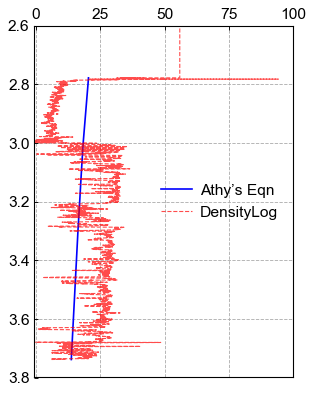

In [42]:
plotTables(Y=[DZ[1:]/1e3,DZ/1e3],X=[phi*100,phi_DensityLog*100],
        Xlim=[-1,100],Ylim=[2.6,3.8],Alpha=[1,0.7],LineWidth=[1.5,1.0],Colors=['b','r'],
        DataNames=['Athy’s Eqn','DensityLog'],InvertY=True,img_fname='img.png')

> ##### Pore pressure by Athy's equation in MPa  
The Pore pressure by Athy's can be calculated as follows:  
$$ p_p = \sigma_v +\frac{1}{\beta}\ln{\frac{\phi}{\phi_0}} $$

In [48]:
#Volve Shale

#Total vertical stress
Sv=integrate.cumtrapz(rho*g, DZ)

#Porosity by density log
rho_m=2.6878*g_cm3

phi=(rho_m-rho)/(rho_m-rho_w)

#Pore pressure by Athy
phi0=0.37
beta=0.0266*(1/mega*Pa)

p_pore=Sv+1/beta*np.log(phi[1:]/phi0)

showTables(X=[DZ/1e3,DZ/1e3],Y=[phi,p_pore/1e6],
           XLables=['Depth_Volve(km)','Depth_Volve(km)'],
           YLabels=['Porosity_Volve(-)','Pore Pressure'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


,Depth_Volve(km),Porosity_Volve(-)
0,0.000000,0.555635
1,2.873807,0.056464
2,2.969971,0.059900
3,3.066136,0.151025
4,3.162300,0.306434
5,3.258464,0.259154
6,3.354629,0.289134
7,3.450793,0.261879
8,3.546958,0.275447
9,3.643122,0.234921


> ##### (b) Plot this calculated pore pressure together with the hydrostatic pressure and total vertical stress (versus depth).

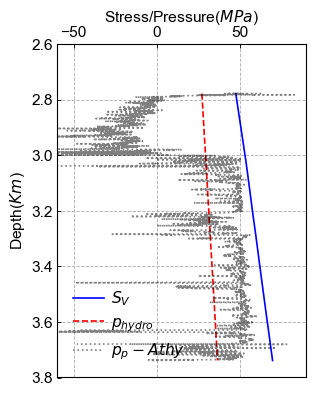

In [76]:
plotTables(Y=[DZ[1:]/1e3,DZ[1:]/1e3,DZ[1:]/1e3],X=[Sv/1e6,rho_w*g*DZ[1:]/1e6,p_pore/1e6],
           XLable='Stress/Pressure($MPa$)',YLabel='Depth($Km$)',
           DataNames=['$S_V$','$p_{hydro}$','$p_p-Athy$'],
           Ylim=[2.6,3.8],Xlim=[-60,90],Alpha=[1,1.0,0.5],
           InvertY=True,img_fname='img.png')

> ##### (c) Gradient of vertical stress in MPa/km.  
The gradient is computed by SV/DZ as follows: